In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [6]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
clf.C = 1.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.95614035087719296

In [8]:
clf.C = 100.0
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.97368421052631582

In [9]:
C_range = [1e-5, 1e-3, 1e-2, 1, 1e2, 1e5, 1e10]

In [10]:
C_range_exp = np.arange(-15.0,21.0)
C_range = 10 ** C_range_exp

In [11]:
C_range

array([  1.00000000e-15,   1.00000000e-14,   1.00000000e-13,
         1.00000000e-12,   1.00000000e-11,   1.00000000e-10,
         1.00000000e-09,   1.00000000e-08,   1.00000000e-07,
         1.00000000e-06,   1.00000000e-05,   1.00000000e-04,
         1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
         1.00000000e+03,   1.00000000e+04,   1.00000000e+05,
         1.00000000e+06,   1.00000000e+07,   1.00000000e+08,
         1.00000000e+09,   1.00000000e+10,   1.00000000e+11,
         1.00000000e+12,   1.00000000e+13,   1.00000000e+14,
         1.00000000e+15,   1.00000000e+16,   1.00000000e+17,
         1.00000000e+18,   1.00000000e+19,   1.00000000e+20])

In [12]:
from sklearn.model_selection import GridSearchCV

param = {'C':C_range} # clf.C

gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-15,   1.00000e-14,   1.00000e-13,   1.00000e-12,
         1.00000e-11,   1.00000e-10,   1.00000e-09,   1.00000e-08,
         1.00000e-07,   1.00000e-06,   1.00000e-05,   1.00000e-04,
         1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.0000...,   1.00000e+15,   1.00000e+16,
         1.00000e+17,   1.00000e+18,   1.00000e+19,   1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
gs.cv_results_

{'mean_fit_time': array([ 0.00058198,  0.00047294,  0.00039776,  0.00037726,  0.0003957 ,
         0.00040301,  0.00039927,  0.00045164,  0.00040905,  0.00045268,
         0.00040054,  0.00049162,  0.00055019,  0.000513  ,  0.00063523,
         0.0009017 ,  0.00109275,  0.00141088,  0.00213369,  0.00283265,
         0.0037996 ,  0.00780932,  0.00853141,  0.00929721,  0.00968107,
         0.01109163,  0.00906467,  0.01025907,  0.00918269,  0.010065  ,
         0.01098371,  0.00951131,  0.00972875,  0.01047421,  0.00867081,
         0.00860802]),
 'mean_score_time': array([ 0.00019693,  0.00016165,  0.00013192,  0.00012533,  0.00012938,
         0.00012906,  0.00014861,  0.00016483,  0.00013439,  0.00013494,
         0.00012509,  0.00013192,  0.00015346,  0.00014091,  0.000127  ,
         0.00020027,  0.00014098,  0.00013312,  0.000163  ,  0.0001754 ,
         0.00017428,  0.00020933,  0.00021497,  0.00024343,  0.00024001,
         0.00022125,  0.00018907,  0.00021601,  0.00017627,  0.00

In [14]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0},
 0.96703296703296704,
 LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [15]:
clf_best = gs.best_estimator_
# clf_best.fit(X_train, y_train) # training of classifier
clf_best.score(X_test, y_test)

0.96491228070175439

In [16]:
# gs.fit(X_train, y_train) # grid search, and training classifier
gs.score(X_test, y_test)

0.96491228070175439

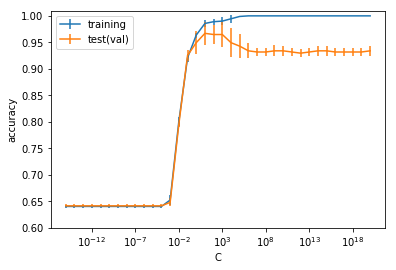

In [17]:
plt.errorbar(gs.cv_results_['param_C'].data, 
             gs.cv_results_['mean_train_score'], 
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_test_score'], 
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best");

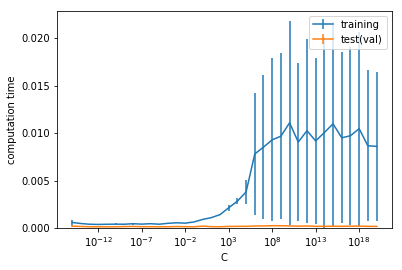

In [18]:
plt.errorbar(gs.cv_results_['param_C'].data, 
             gs.cv_results_['mean_fit_time'], 
             yerr=gs.cv_results_['std_fit_time'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_score_time'], 
             yerr=gs.cv_results_['std_score_time'],
             label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time")
plt.legend(loc="best");

In [19]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 5.0)
C_range = 10 ** C_range_exp

param = {'C': C_range,
         'kernel': ['linear', 'rbf']}

gs = GridSearchCV(clf, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=rbf ..............................................
[CV] C=0.01, kernel=rbf ..............................................
[CV] C=0.1, kernel=linear ............................................
[CV] C=0.01, kernel=rbf ..............................................
[CV] C=0.1, kernel=linear ............................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ............................... C=0.01, kernel=rbf, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ...........

[Parallel(n_jobs=-1)]: Done   5 out of  42 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04]), 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [20]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 100.0, 'kernel': 'rbf'},
 0.97142857142857142,
 SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))

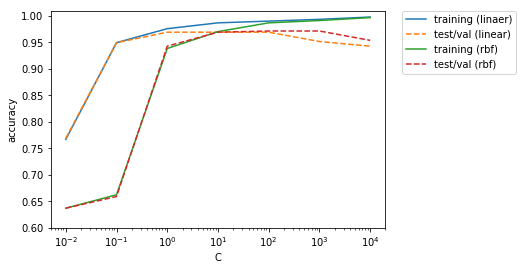

In [21]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_train_score'][s_linear],
         label="training (linaer)")

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linear)")


s_rbf = [gs.cv_results_['param_kernel']=='rbf']

plt.plot(gs.cv_results_['param_C'][s_rbf].data, 
         gs.cv_results_['mean_train_score'][s_rbf],
         label="training (rbf)")

plt.plot(gs.cv_results_['param_C'][s_rbf].data, 
         gs.cv_results_['mean_test_score'][s_rbf],
         linestyle="--",
         label="test/val (rbf)")



plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [22]:
gs.score(X_test, y_test)

0.96491228070175439

In [23]:
SVC(kernel='rbf').gamma

'auto'

In [24]:
from sklearn.svm import SVC

clf = SVC()

C_range_exp = np.arange(-2.0, 10.0)
C_range = 10 ** C_range_exp

gamma_range_exp = np.arange(-10.0, 0.0, 3)
gamma_range = 10 ** gamma_range_exp

param = [ {'C': C_range,
           'kernel': ['linear']},
         
          {'C': C_range,
           'gamma': gamma_range, 
           'kernel': ['rbf']} ]

gs = GridSearchCV(clf, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.01, kernel=linear ...........................................
[CV] C=0.1, kernel=linear ............................................
[CV] C=0.1, kernel=linear ............................................
[CV] C=0.1, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................ C=0.01, kernel=linear, total=   0.0s
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] ............................. C=0.1, kernel=linear, total=   0.0s
[CV] C=1.0, ker

[CV] C=100000.0, kernel=linear .......................................
[CV] ................ C=100.0, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100.0, gamma=0.0001, kernel=rbf ...............................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] ................... C=0.1, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] ........................ C=100000.0, kernel=linear, total=   0.0s
[CV] .................. C=10.0, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] C=100000.0, kernel=linear .......................................
[CV] .............. C=100000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................
[CV] C=10.0, gamma=0.0001, kernel=rbf ................................
[CV] C=100000.0, gamma=1e-10, kernel=rbf .............................
[CV] ........................ C=100000.0, kernel=linear, total=   0.0s
[CV] .

[CV] C=1000000.0, gamma=0.1, kernel=rbf ..............................
[CV] ................. C=100.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] ................ C=100000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100000.0, gamma=0.1, kernel=rbf ...............................
[CV] ............... C=1000000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] ........... C=100000000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=10000000.0, gamma=1e-10, kernel=rbf ...........................
[CV] C=100000000.0, gamma=1e-10, kernel=rbf ..........................
[CV] .......... C=1000000000.0, gamma=1e-10, kernel=rbf, total=   0.0s
[CV] C=1000000000.0, gamma=1e-07, kernel=rbf .........................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ................ C=100000.0, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000000.0, gamma=1e-10, kernel=rbf ............................
[CV] .

[CV] C=0.01, gamma=1e-07, kernel=rbf .................................
[CV] .................. C=0.01, gamma=1e-07, kernel=rbf, total=   0.0s
[CV] ....................... C=1000000.0, kernel=linear, total=   0.1s
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV] C=10000000.0, kernel=linear .....................................
[CV] ...................... C=10000000.0, kernel=linear, total=   0.0s
[CV] C=10000000.0, kernel=linear .....................................
[CV] ................. C=0.01, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] ...................... C=10000000.0, kernel=linear, total=   0.0s
[CV] C=10000000.0, kernel=linear .....................................
[CV] C=0.01, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=0.01, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] ...................... C=10000000.0, kernel=linear, total=   0.1s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09]), 'kernel': ['linear']}, {'C': array([  1.00000e-02,   1.00000e-01,   1.00000e+00...), 'gamma': array([  1.00000e-10,   1.00000e-07,   1.00000e-04,   1.00000e-01]), 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [25]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 10.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'},
 0.97362637362637361,
 SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma=0.10000000000000001,
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False))

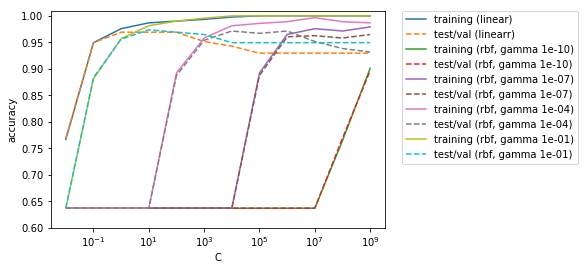

In [26]:
s_linear = [gs.cv_results_['param_kernel']=='linear']

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_train_score'][s_linear],
         label="training (linear)")

plt.plot(gs.cv_results_['param_C'][s_linear].data, 
         gs.cv_results_['mean_test_score'][s_linear],
         linestyle="--",
         label="test/val (linearr)")





s_rbf = [gs.cv_results_['param_kernel']=='rbf']

for g in gamma_range:
    s_gamma = gs.cv_results_['param_gamma'][s_rbf].data == g

    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data, 
             gs.cv_results_['mean_train_score'][s_rbf][s_gamma],
             label="training (rbf, gamma {0:.0e})".format(g))
    
    plt.plot(gs.cv_results_['param_C'][s_rbf][s_gamma].data, 
             gs.cv_results_['mean_test_score'][s_rbf][s_gamma],
             linestyle="--",
             label="test/val (rbf, gamma {0:.0e})".format(g))

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [27]:
gs.score(X_test, y_test)

0.96491228070175439

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [29]:
param = {'n_neighbors': range(1,20) }

gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [30]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'n_neighbors': 5},
 0.96483516483516485,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'))

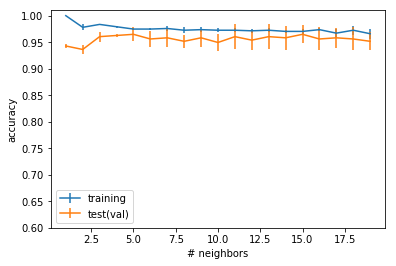

In [31]:
plt.errorbar(gs.cv_results_['param_n_neighbors'].data, 
             gs.cv_results_['mean_train_score'], 
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_n_neighbors'].data,
             gs.cv_results_['mean_test_score'], 
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.6, 1.01)
plt.xlabel("# neighbors")
plt.ylabel("accuracy")
plt.legend(loc="best");

In [32]:
gs.score(X_test, y_test)

0.95614035087719296

In [33]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=2000)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
param = {'hidden_layer_sizes': [(10,), (50,), (100,),
                                (10,10,), (50,50,), (100,100,),
                                (10, 5,), (5,5,), (30, 20, 10),
                                (100,1000,50,), (1000,100,50,),
                                (10,10,10), (50,50,50), (100,100,100,),
                                ],
          'activation' : ['identity', 'logistic', 'tanh', 'relu'],
          'beta_1' : [0.9, 0.8, 0.7, 0.6, 0.5],
          'beta_2' : [0.999, 0.9, 0.8, 0.7],
          'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
        }

In [35]:
gs = GridSearchCV(clf, param, n_jobs=-1, verbose=1)
# gs.fit(X_train, y_train)

# # Fitting 3 folds for each of 6720 candidates, totalling 20160 fits

In [36]:
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(clf, param,
                        n_iter=20, 
                        n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] hidden_layer_sizes=(100, 100), beta_2=0.7, beta_1=0.9, alpha=1e-05, activation=relu 
[CV] hidden_layer_sizes=(100, 100), beta_2=0.7, beta_1=0.9, alpha=1e-05, activation=relu 
[CV] hidden_layer_sizes=(100, 100), beta_2=0.7, beta_1=0.9, alpha=1e-05, activation=relu 
[CV] hidden_layer_sizes=(10, 10), beta_2=0.8, beta_1=0.7, alpha=0.001, activation=relu 
[CV] hidden_layer_sizes=(10, 10), beta_2=0.8, beta_1=0.7, alpha=0.001, activation=relu 
[CV] hidden_layer_sizes=(10, 10), beta_2=0.8, beta_1=0.7, alpha=0.001, activation=relu 
[CV] hidden_layer_sizes=(10, 5), beta_2=0.8, beta_1=0.7, alpha=0.01, activation=identity 
[CV] hidden_layer_sizes=(10, 5), beta_2=0.8, beta_1=0.7, alpha=0.01, activation=identity 
[CV]  hidden_layer_sizes=(10, 5), beta_2=0.8, beta_1=0.7, alpha=0.01, activation=identity, total=   0.5s
[CV] hidden_layer_sizes=(10, 5), beta_2=0.8, beta_1=0.7, alpha=0.01, activation=identity 
[CV]  hidden_layer_sizes=(10, 

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s


[CV]  hidden_layer_sizes=(5, 5), beta_2=0.7, beta_1=0.5, alpha=0.01, activation=tanh, total=   0.5s
[CV] hidden_layer_sizes=(100, 100), beta_2=0.7, beta_1=0.7, alpha=0.001, activation=logistic 
[CV]  hidden_layer_sizes=(100, 100, 100), beta_2=0.9, beta_1=0.6, alpha=1, activation=identity, total=   1.8s
[CV] hidden_layer_sizes=(100, 100), beta_2=0.7, beta_1=0.7, alpha=0.001, activation=logistic 
[CV]  hidden_layer_sizes=(100, 100, 100), beta_2=0.9, beta_1=0.6, alpha=1, activation=identity, total=   1.8s
[CV] hidden_layer_sizes=(100, 100), beta_2=0.7, beta_1=0.7, alpha=0.001, activation=logistic 
[CV]  hidden_layer_sizes=(100, 100, 100), beta_2=0.9, beta_1=0.6, alpha=1, activation=identity, total=   1.5s
[CV] hidden_layer_sizes=(10, 10, 10), beta_2=0.7, beta_1=0.7, alpha=0.1, activation=tanh 
[CV]  hidden_layer_sizes=(10, 10, 10), beta_2=0.999, beta_1=0.8, alpha=0.01, activation=relu, total=   1.4s
[CV] hidden_layer_sizes=(10, 10, 10), beta_2=0.7, beta_1=0.7, alpha=0.1, activation=tanh 


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100), (10, 5), (5, 5), (30, 20, 10), (100, 1000, 50), (1000, 100, 50), (10, 10, 10), (50, 50, 50), (100, 100, 100)], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'beta_1': [0.9, 0.8, 0.7, 0.6, 0.5], 'beta_2': [0.999, 0.9, 0.8, 0.7], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_st

In [37]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'activation': 'identity',
  'alpha': 0.01,
  'beta_1': 0.5,
  'beta_2': 0.999,
  'hidden_layer_sizes': (100, 100, 100)},
 0.97362637362637361,
 MLPClassifier(activation='identity', alpha=0.01, batch_size='auto',
        beta_1=0.5, beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
        learning_rate_init=0.001, max_iter=2000, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False))

In [38]:
gs.score(X_test, y_test)

0.97368421052631582